In [1]:
# pandas, numpy, matplotlib, %matplotlib inline, seaborn 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import the model

from sklearn import linear_model

#import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('clean_marketing.csv')

In [4]:
data.head()

Unnamed: 0 customer       state  customer_lifetime_value response  \
0           0  BU79786  Washington              2763.519279       No   
1           1  QZ44356     Arizona              6979.535903       No   
2           2  AI49188      Nevada             12887.431650       No   
3           3  WW63253  California              7645.861827       No   
4           4  HB64268  Washington              2813.692575       No   

   coverage education effective_to_date employmentstatus gender  ...  \
0     Basic  Bachelor        2011-02-24         Employed      F  ...   
1  Extended  Bachelor        2011-01-31       Unemployed      F  ...   
2   Premium  Bachelor        2011-02-19         Employed      F  ...   
3     Basic  Bachelor        2011-01-20       Unemployed      M  ...   
4     Basic  Bachelor        2011-02-03         Employed      M  ...   

   number_of_open_complaints number_of_policies     policy_type        policy  \
0                          0                  1  Corporate Auto  Corporate L3   
1                          0                  8   Personal Auto   Personal L3   
2                          0                  2   Personal Auto   Personal L3   
3                          0                  7  Corporate Auto  Corporate L2   
4                          0                  1   Personal Auto   Personal L1   

   renew_offer_type  sales_channel  total_claim_amount  vehicle_class  \
0            Offer1          Agent          384.811147   Two-Door Car   
1            Offer3          Agent         1131.464935  Four-Door Car   
2            Offer1          Agent          566.472247   Two-Door Car   
3            Offer1    Call Center          529.881344            SUV   
4            Offer1          Agent          138.130879  Four-Door Car   

  vehicle_size effective_to_date_month  
0      Medsize                       2  
1      Medsize                       1  
2      Medsize                       2  
3      Medsize                       1  
4      Medsize                       2  

[5 rows x 26 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     9134 non-null   int64  
 1   customer                       9134 non-null   object 
 2   state                          9134 non-null   object 
 3   customer_lifetime_value        9134 non-null   float64
 4   response                       9134 non-null   object 
 5   coverage                       9134 non-null   object 
 6   education                      9134 non-null   object 
 7   effective_to_date              9134 non-null   object 
 8   employmentstatus               9134 non-null   object 
 9   gender                         9134 non-null   object 
 10  income                         9134 non-null   int64  
 11  location_code                  9134 non-null   object 
 12  marital_status                 9134 non-null   o

## Isolate the numeric data

In [6]:
data_num = data.select_dtypes(include=np.number)

In [7]:
data_num.head()

Unnamed: 0  customer_lifetime_value  income  monthly_premium_auto  \
0           0              2763.519279   56274                    69   
1           1              6979.535903       0                    94   
2           2             12887.431650   48767                   108   
3           3              7645.861827       0                   106   
4           4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  \
0                          0                   1          384.811147   
1                          0                   8         1131.464935   
2                          0                   2          566.472247   
3                          0                   7          529.881344   
4                          0                   1          138.130879   

   effective_to_date_month  
0                        2  
1                        1  
2                        2  
3                        1  
4                        2

In [8]:
data_num.shape

(9134, 10)

## Clarify the objective including determining the label (column) we wish to predict

Predict `total_claim_amount`

In [9]:
y = data_num['total_claim_amount']

In [10]:
x = data_num.drop(['total_claim_amount'], axis=1)

In [11]:
lm = linear_model.LinearRegression()

In [13]:
line = lm.fit(x, y)

lm.score(x, y)

0.5188232701358604

In [14]:
predictions = lm.predict(x)
predictions

array([242.3846191 , 559.48034308, 467.50841438, ..., 518.42714229,
       509.60521733, 478.77124695])

In [15]:
r2_score(y, predictions)

0.5188232701358604

In [17]:
lm.intercept_

66.24243562706107

In [19]:
lm.coef_

array([ 1.39475926e-03, -6.85010581e-04, -3.29171571e-03,  5.34366918e+00,
       -1.45140438e-01, -1.01788808e-01, -1.36015566e+00,  2.69049676e-01,
       -2.77775665e-01])

## Pre-processing

In [20]:
y = data['total_claim_amount']

In [ ]:
x = data.drop(['total_claim_amount'], axis=1)

In [21]:
x_num = data.select_dtypes(include = np.number)
x_cat = data.select_dtypes(include = object)

## Check for multicollinearity

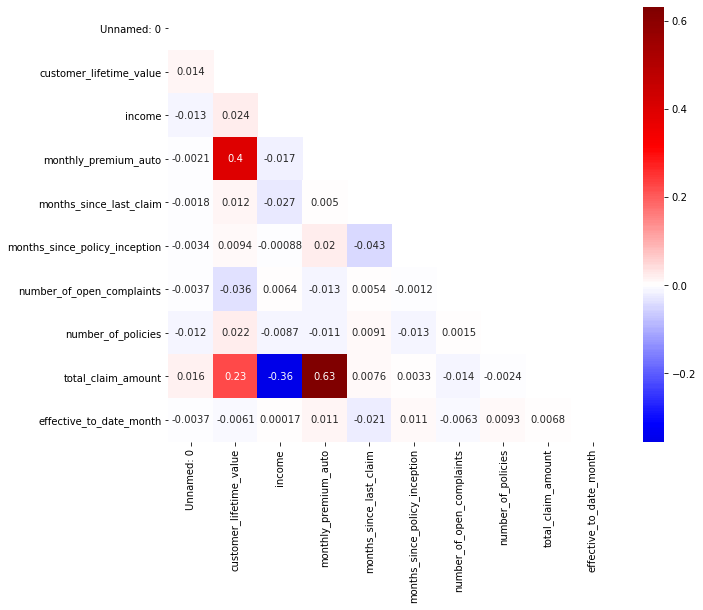

In [22]:
correlation_matrix = data.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='seismic', center=0)
plt.show()

There doesn't appear to be any extremely high correlation between any of the columns, so only dropping the `Unnamed: 0` column (same as index).

In [23]:
x_num = x_num.drop(['Unnamed: 0'], axis=1)
x_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'effective_to_date_month'],
      dtype='object')

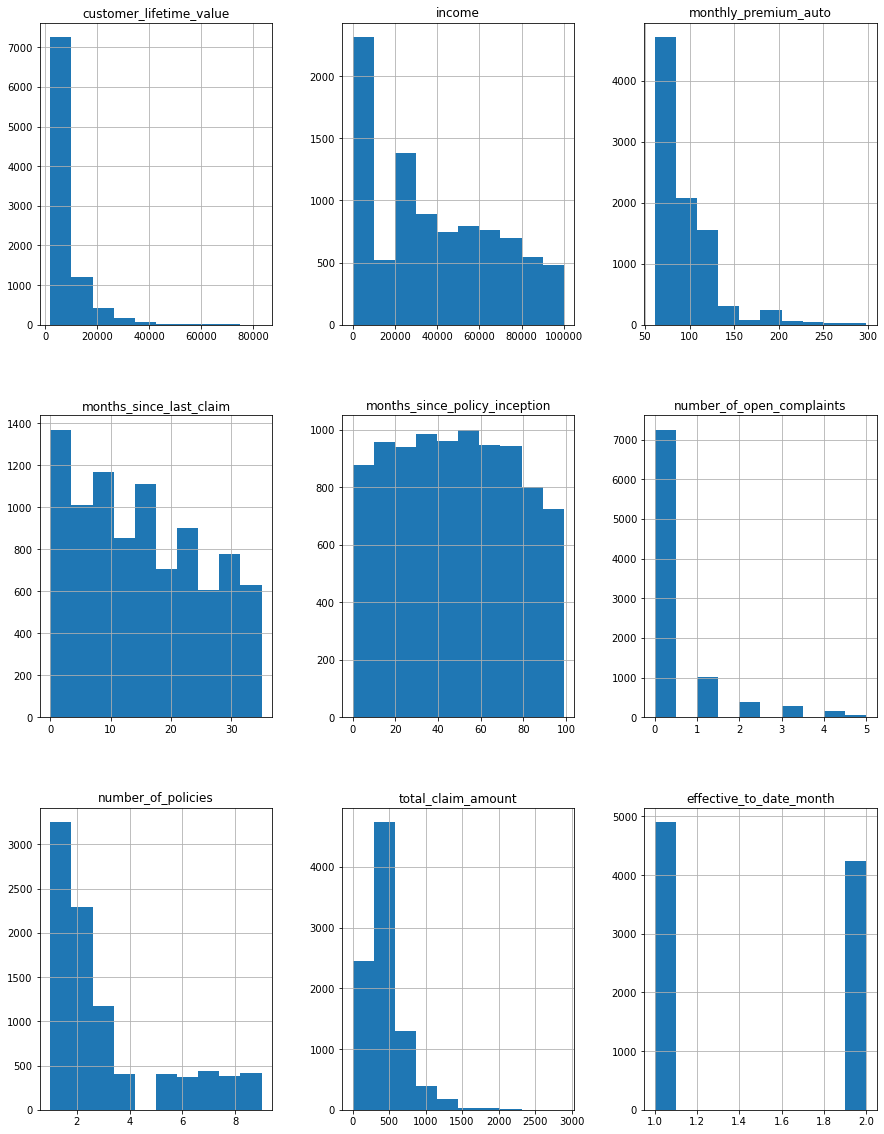

In [24]:
x_num.hist(figsize=(15, 20));

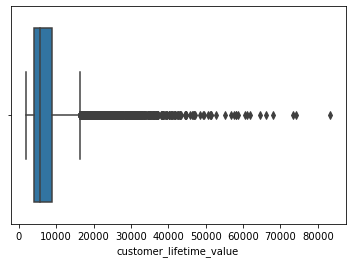

In [25]:
sns.boxplot(x=x_num['customer_lifetime_value'])

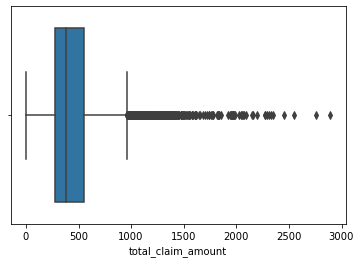

In [26]:
sns.boxplot(x=x_num['total_claim_amount'])

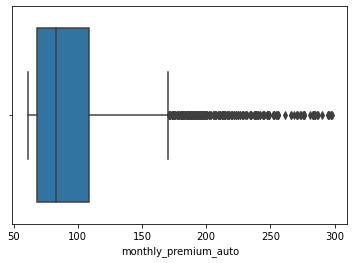

In [27]:
sns.boxplot(x=x_num['monthly_premium_auto'])

In [28]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler().fit(x_num)
x_robust = robust.transform(x_num)

scaled_robust = pd.DataFrame(x_robust)

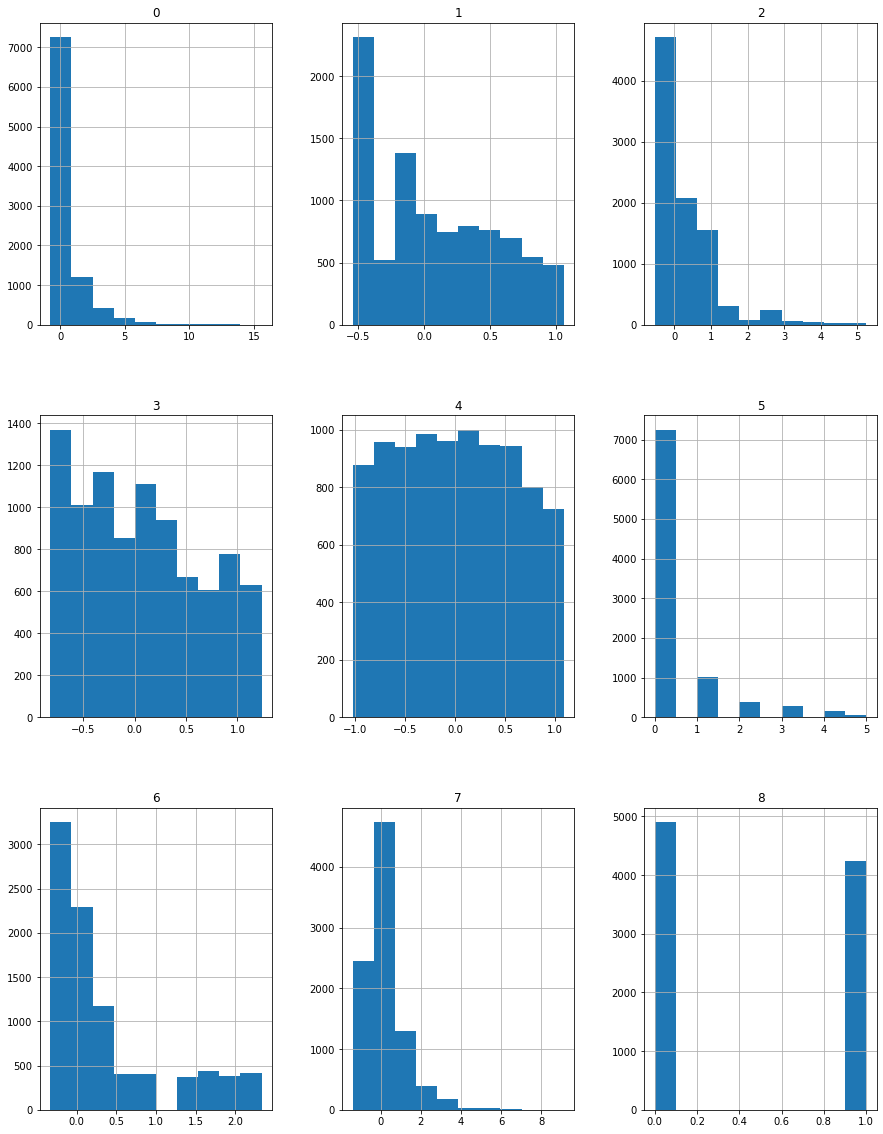

In [30]:
scaled_robust.hist(figsize=(15, 20));

In [34]:
from sklearn.preprocessing import MinMaxScaler
transform = MinMaxScaler().fit(x_num)
x_mmscaled = transform.transform(x_num)

scaled_mmscaled = pd.DataFrame(x_mmscaled)

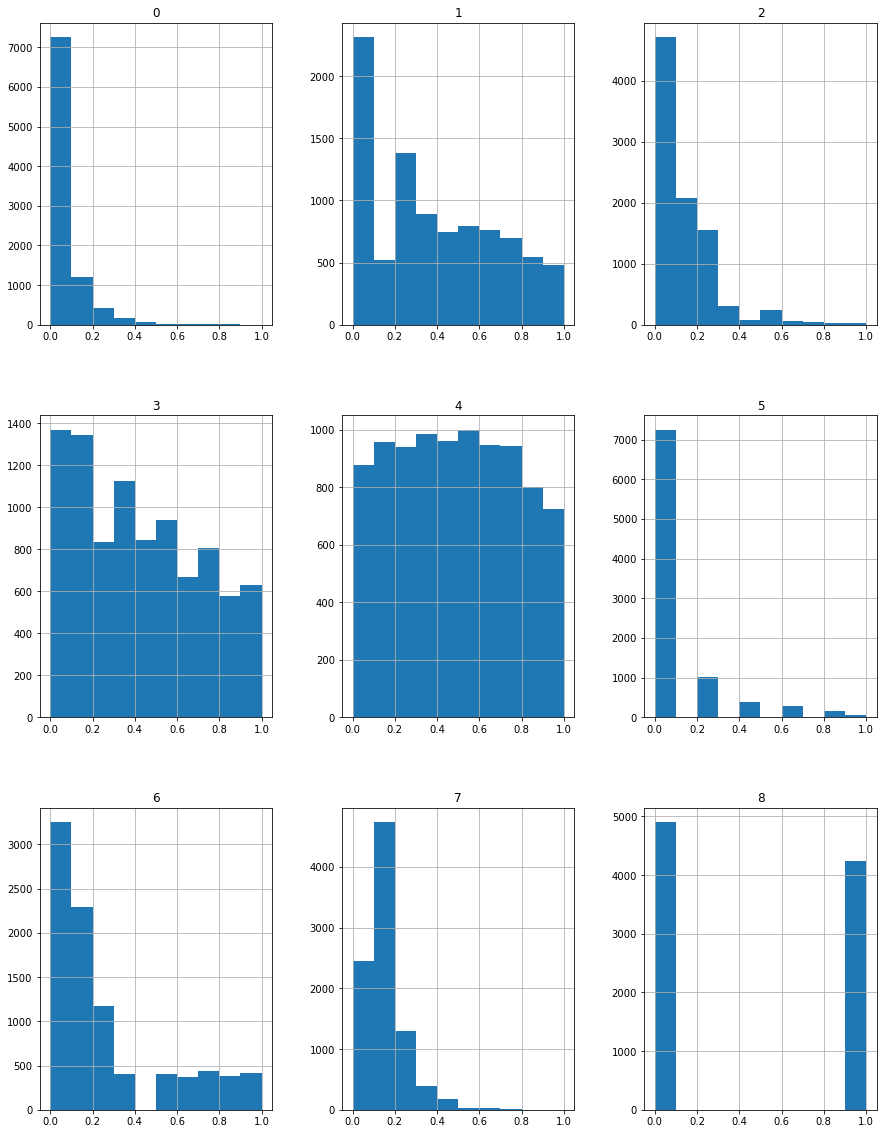

In [35]:
scaled_mmscaled.hist(figsize=(15, 20));

In [36]:
x_num = x_mmscaled

## Pre-processing categorial columns

In [37]:
x_cat

customer       state response  coverage education effective_to_date  \
0     BU79786  Washington       No     Basic  Bachelor        2011-02-24   
1     QZ44356     Arizona       No  Extended  Bachelor        2011-01-31   
2     AI49188      Nevada       No   Premium  Bachelor        2011-02-19   
3     WW63253  California       No     Basic  Bachelor        2011-01-20   
4     HB64268  Washington       No     Basic  Bachelor        2011-02-03   
...       ...         ...      ...       ...       ...               ...   
9129  LA72316  California       No     Basic  Bachelor        2011-02-10   
9130  PK87824  California      Yes  Extended   College        2011-02-12   
9131  TD14365  California       No  Extended  Bachelor        2011-02-06   
9132  UP19263  California       No  Extended   College        2011-02-03   
9133  Y167826  California       No  Extended   College        2011-02-14   

     employmentstatus gender location_code marital_status     policy_type  \
0            Employed      F      Suburban        Married  Corporate Auto   
1          Unemployed      F      Suburban         Single   Personal Auto   
2            Employed      F      Suburban        Married   Personal Auto   
3          Unemployed      M      Suburban        Married  Corporate Auto   
4            Employed      M         Rural         Single   Personal Auto   
...               ...    ...           ...            ...             ...   
9129         Employed      M         Urban        Married   Personal Auto   
9130         Employed      F      Suburban       Divorced  Corporate Auto   
9131       Unemployed      M      Suburban         Single  Corporate Auto   
9132         Employed      M      Suburban        Married   Personal Auto   
9133       Unemployed      M      Suburban         Single  Corporate Auto   

            policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0     Corporate L3           Offer1         Agent   Two-Door Car      Medsize  
1      Personal L3           Offer3         Agent  Four-Door Car      Medsize  
2      Personal L3           Offer1         Agent   Two-Door Car      Medsize  
3     Corporate L2           Offer1   Call Center            SUV      Medsize  
4      Personal L1           Offer1         Agent  Four-Door Car      Medsize  
...            ...              ...           ...            ...          ...  
9129   Personal L1           Offer2           Web  Four-Door Car      Medsize  
9130  Corporate L3           Offer1        Branch  Four-Door Car      Medsize  
9131  Corporate L2           Offer1        Branch  Four-Door Car      Medsize  
9132   Personal L2           Offer3        Branch  Four-Door Car        Large  
9133  Corporate L3           Offer4   Call Center   Two-Door Car      Medsize  

[9134 rows x 16 columns]

In [38]:
x_cat['policy_type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [39]:
x_cat['policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [40]:
x_cat = x_cat.drop(['customer', 'effective_to_date', 'policy_type'], axis=1)
x_cat.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

## Turning categories into numbers

In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(x_cat)
encoded = encoder.transform(x_cat).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [43]:
x_cat = encoded

In [44]:
y.shape

(9134,)

In [45]:
x_cat.shape

(9134, 41)

In [46]:
x_num.shape

(9134, 9)

## Bring categorical and numerical X back together

In [47]:
x = np.concatenate((x_num, x_cat), axis=1)

In [48]:
x.shape

(9134, 50)

In [49]:
y.shape

(9134,)

## Split the data into train and test

In [52]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=40)

## Apply the model again (to the preprocessed data)

In [56]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train) # teach the model to find the line of best fit
predictions = lm.predict(x_test) # run predictions based on X_test (we cannot see y_test)
r2_score(y_test, predictions) # compare y_test to predictions

1.0

In [57]:
model.score(x_train, y_train)

1.0

In [58]:
predictions

array([451.2     , 355.2     , 537.6     , ..., 688.547375, 312.      ,
         1.587888])

In [59]:
x_test.shape

(2741, 50)

In [60]:
y_test.shape

(2741,)

In [61]:
mse = mean_squared_error(y_test, predictions)
mse

1.3214856303862018e-24

In [62]:
rmse = np.sqrt(mse)
rmse

1.1495588851321195e-12